In [1]:
#dependencies
import csv 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read csv file and convert to dataframe
home_prices_df = pd.read_csv('Resources/City_Zhvi_SingleFamilyResidence.csv')

#filter original dataframe to contain records for only cities in Los Angeles county
home_prices_df = home_prices_df.loc[home_prices_df.CountyName == "Los Angeles"]

#delete data columns not needed for data analysis 
del home_prices_df['RegionID']
del home_prices_df['Metro']
del home_prices_df['SizeRank']



In [3]:
home_prices_df = home_prices_df.reset_index(drop=True)
home_prices_df = home_prices_df.rename(columns={'RegionName':'CITY'})
home_prices_df.head()

,CITY,State,CountyName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
0,Los Angeles,CA,Los Angeles,166400.0,165900.0,165500.0,164900.0,164500.0,164100.0,163800.0,...,671300,677400,683200,688500,693800,700600,707800,712300,714100,714700
1,Long Beach,CA,Los Angeles,163600.0,163300.0,162900.0,162600.0,162300.0,162000.0,162000.0,...,604500,610500,615300,618900,621700,625900,630400,633100,633700,633200
2,Glendale,CA,Los Angeles,243700.0,243400.0,243100.0,242600.0,242300.0,242100.0,242100.0,...,874900,881800,888700,894700,900400,908100,916600,922500,926000,927000
3,Lancaster,CA,Los Angeles,102300.0,101600.0,100800.0,100000.0,99200.0,98400.0,97700.0,...,253900,257600,261000,264100,266900,270400,273900,276100,277800,279200
4,Palmdale,CA,Los Angeles,107100.0,106900.0,106600.0,106300.0,106000.0,105700.0,105600.0,...,284000,287400,290300,293500,297000,300700,304000,306600,308500,309700


In [4]:
#delete columns not needed for analysis
del home_prices_df['State']
del home_prices_df['CountyName']



In [5]:
indexed_home_prices = home_prices_df.set_index('CITY')
filtered_home_prices_df = indexed_home_prices.loc[:,'2017-01':'2017-12']
filtered_home_prices_df.head()


,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
CITY,,,,,,,,,,,,
Los Angeles,645000,647900,650700,653500,656900,661200,665600,671300,677400,683200,688500,693800
Long Beach,584700,586900,588500,590300,592900,595900,599200,604500,610500,615300,618900,621700
Glendale,850000,853300,855200,856100,858500,863600,868900,874900,881800,888700,894700,900400
Lancaster,235200,236900,238900,241500,244300,247400,250500,253900,257600,261000,264100,266900
Palmdale,265300,267400,269600,272000,274900,277800,280600,284000,287400,290300,293500,297000


In [6]:
home_prices_2017 = filtered_home_prices_df.T
home_prices_2017.head()

CITY,Los Angeles,Long Beach,Glendale,Lancaster,Palmdale,Santa Clarita,Pomona,Pasadena,Torrance,Inglewood,...,Acton,Avalon,Pearblossom,Rolling Hills Estates,Rolling Hills,Hidden Hills,Palos Verdes Peninsula,Lake Hughes,East Pasadena,Green Valley
2017-01,645000,584700,850000,235200,265300,544800,374700,828400,794100,477500,...,555900,665600,195000,1531400,3223500,2944900,1481500,238900,916100,223200
2017-02,647900,586900,853300,236900,267400,546900,377100,830300,797500,483000,...,558400,659600,193200,1532500,3216800,2961500,1473500,240200,913800,225400
2017-03,650700,588500,855200,238900,269600,548000,379200,831400,799600,488300,...,559900,650600,191100,1537000,3192300,2966100,1473300,241100,913300,231200
2017-04,653500,590300,856100,241500,272000,549300,382100,834400,801500,493300,...,558300,644400,189000,1543900,3172300,2962000,1471300,243400,913200,237500
2017-05,656900,592900,858500,244300,274900,551700,385400,839700,804700,498400,...,556700,640500,189800,1549000,3169800,2970400,1470700,246200,910000,243300


In [8]:
home_prices_2017.to_csv('Resources/homePrices2017.csv')

In [9]:
#monthly percent changes in house prices in 2017
percent_change_prices_2017 = home_prices_2017.pct_change()*100
percent_change_prices_2017 = percent_change_prices_2017.fillna(value=0)
home_price_time_series = percent_change_prices_2017.T
home_price_time_series.head()

,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
CITY,,,,,,,,,,,,
Los Angeles,0.0,0.449612,0.432165,0.430306,0.520275,0.654590,0.665457,0.856370,0.908685,0.856215,0.775761,0.769789
Long Beach,0.0,0.376261,0.272619,0.305862,0.440454,0.505988,0.553784,0.884513,0.992556,0.786241,0.585080,0.452416
Glendale,0.0,0.388235,0.222665,0.105239,0.280341,0.594059,0.613710,0.690528,0.788662,0.782490,0.675143,0.637085
Lancaster,0.0,0.722789,0.844238,1.088321,1.159420,1.268932,1.253032,1.357285,1.457267,1.319876,1.187739,1.060204
Palmdale,0.0,0.791557,0.822737,0.890208,1.066176,1.054929,1.007919,1.211689,1.197183,1.009047,1.102308,1.192504


In [10]:
#dataframe to get average % change in home prices for 2017
perc_change_stat_summary = percent_change_prices_2017.describe().T

#add mean percent change in home prices into dataframe and sort in descending
home_price_time_series['Annual Avg % Change'] = perc_change_stat_summary['mean']
home_price_time_series = home_price_time_series.sort_values(by='Annual Avg % Change', ascending=False)
home_price_time_series.head()

,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,Annual Avg % Change
CITY,,,,,,,,,,,,,
Green Valley,0.0,0.985663,2.573203,2.724913,2.442105,1.397452,1.499797,1.277955,1.340694,1.284047,2.151364,1.955622,1.636068
Ladera Heights,0.0,1.042672,1.146570,0.850179,1.208318,1.582601,1.521501,1.669209,1.703593,1.570908,1.495343,1.347028,1.261494
Inglewood,0.0,1.151832,1.097308,1.023961,1.033854,1.284109,1.723455,2.025316,1.775148,1.350338,1.295337,1.187431,1.245674
Westmont,0.0,0.675325,0.619195,0.461538,0.765697,1.013171,1.429288,1.755253,1.749271,1.575931,1.622003,1.804303,1.122581
Lancaster,0.0,0.722789,0.844238,1.088321,1.159420,1.268932,1.253032,1.357285,1.457267,1.319876,1.187739,1.060204,1.059925


Use the dataframe above to combine with the annual crime frequency value and add and then create a plot for crime frequency x annual percent change

home_price_time_series dataframe will be merged with the crime data; to get the crime frequency 

In [11]:
home_price_city_list = list(home_price_time_series.index.values)

In [13]:
#upload list of cities in Los Angeles county csv file
cities_laCounty_df = pd.read_csv("RawData/cities_losAngelesCounty.csv")

#list of cities in Los Angeles County
city_list = cities_laCounty_df['city']
city_list = [city.title() for city in city_list]
print(f'{len(city_list)} cities in Los Angeles County')

FileNotFoundError: File b'RawData/cities_losAngelesCounty.csv' does not exist

In [13]:
#list of Los Angeles County cities with home price data
city_data = []

for city in home_price_city_list:
    if city in city_list:
        city_data.append(city)

print('Los Angeles County cities with home price data in Zillow dataset:\n')
print(city_data)
print('')
print(f'{len(city_data)} cities in Los Angeles County with home price data.')

Los Angeles County cities with home price data in Zillow dataset:

['Inglewood', 'Lancaster', 'Agoura Hills', 'Palmdale', 'Compton', 'Gardena', 'Bell', 'Maywood', 'Paramount', 'Beverly Hills', 'Signal Hill', 'Pomona', 'Huntington Park', 'Covina', 'Hawaiian Gardens', 'Cudahy', 'Commerce', 'Culver City', 'Calabasas', 'Hawthorne', 'Hidden Hills', 'Monterey Park', 'Bell Gardens', 'Montebello', 'South El Monte', 'Malibu', 'Monrovia', 'Bellflower', 'Los Angeles', 'Alhambra', 'South Gate', 'San Fernando', 'La Puente', 'Manhattan Beach', 'Whittier', 'Lynwood', 'West Hollywood', 'Carson', 'Torrance', 'Lawndale', 'Norwalk', 'Pasadena', 'Azusa', 'Pico Rivera', 'El Monte', 'Burbank', 'Redondo Beach', 'Baldwin Park', 'Downey', 'La Habra Heights', 'Lakewood', 'Long Beach', 'Santa Clarita', 'Santa Fe Springs', 'La Mirada', 'Glendale', 'San Gabriel', 'Rosemead', 'Artesia', 'Diamond Bar', 'Lomita', 'Duarte', 'Hermosa Beach', 'Cerritos', 'West Covina', 'Santa Monica', 'El Segundo', 'San Marino', 'Sierra

In [14]:
#create pandas dataframe for historical crime data (2017) from csv file
crime_data_df = pd.read_csv("RawData/2017-PART_I_AND_II_CRIMES.csv")
crime_data_df.head()

,LURN_SAK,INCIDENT_DATE,INCIDENT_REPORTED_DATE,CATEGORY,STAT,STAT_DESC,ADDRESS,STREET,CITY,ZIP,INCIDENT_ID,REPORTING_DISTRICT,SEQ,GANG_RELATED,UNIT_ID,UNIT_NAME,DELETED
0,18288959,8/3/2017 23:53,8/3/2017,VEHICLE / BOATING LAWS,255,VEHICLE AND BOATING LAWS: Misdemeanor,"4300 ROSEMEAD BLVD, ROSEMEAD, CA 91770",4300 ROSEMEAD BLVD,ROSEMEAD,91770.0,917-08914-0531,531,8914,NO,CA0190005,TEMPLE,N
1,18079991,3/7/2017 8:23,3/7/2017,MISCELLANEOUS NON-CRIMINAL,720,"VEHICLE/BOATING LAWS, CITATIONS: Hazardous Cit...","CLARK AVE AND MAPLE ST, BELLFLOWER, CA 90706",CLARK AVE AND MAPLE ST,BELLFLOWER,90706.0,917-05086-1334,1334,5086,NO,CA0190013,LAKEWOOD,N
2,18215223,5/24/2017 9:20,5/24/2017,MISCELLANEOUS NON-CRIMINAL,501,MISCELLANEOUS: Vehicle Repossessed,"11000 ALONDRA BLVD, CERRITOS, CA",11000 ALONDRA BLVD,CERRITOS,NaN,917-02607-2310,2310,2607,NO,CA01900R7,CERRITOS,N
3,18077911,3/4/2017 22:18,3/4/2017,MISCELLANEOUS NON-CRIMINAL,687,"NON-CRIMINAL, CUSTODY INCIDENTS - Inmate Sick/...","11800 S ALAMEDA ST, LYNWOOD, CA 90262",11800 S ALAMEDA ST,LYNWOOD,90262.0,017-00612-5700,5700,612,NO,CA0190053,CRDF,N
4,18382253,10/31/2017 5:00,10/31/2017,ACCIDENTS TRAFFIC/VEH./BOAT,471,"ACCIDENTS, TRAFFIC-VEHICLE OR BOAT: Accident, ...","10TH ST W AND AVENUE L, LANCASTER, CA",10TH ST W AND AVENUE L,LANCASTER,NaN,917-21237-1124,1124,21237,NO,CA0190024,LANCASTER,N


In [15]:
#calculate any missing city values in records
missing_city = crime_data_df['CITY'].isnull().sum()

#print information about how many records are missing city value
#???? reason for dropping crime reported values
if missing_city > 0:
    print(f'{missing_city} out of {len(crime_data_df["CITY"])} records are missing name of the city.')
    crime_data_df = crime_data_df.dropna(subset=['CITY'])
    print(f'{missing_city} records were dropped.')
else:
    print(f'All {len(crime_data_df["CITY"])} records of reported crimes have city values.')



4842 out of 303414 records are missing name of the city.
4842 records were dropped.


In [16]:
#list of cities in the crime data
crime_city_list = crime_data_df['CITY']
crime_city_list = [city.title() for city in crime_city_list]
del crime_data_df['CITY']
crime_data_df['city'] = crime_city_list




In [17]:
crime_analysis_city_list = []

for city in city_data:
    if city in crime_city_list:
        crime_analysis_city_list.append(city)
print(crime_analysis_city_list)
print('')
print(f'Crime reports for {len(crime_analysis_city_list)} cities in Los Angeles County are available in the 2017 Historical Crime Dataset.')

['Inglewood', 'Lancaster', 'Agoura Hills', 'Palmdale', 'Compton', 'Gardena', 'Bell', 'Maywood', 'Paramount', 'Beverly Hills', 'Signal Hill', 'Pomona', 'Huntington Park', 'Covina', 'Hawaiian Gardens', 'Cudahy', 'Commerce', 'Culver City', 'Calabasas', 'Hawthorne', 'Hidden Hills', 'Monterey Park', 'Bell Gardens', 'Montebello', 'South El Monte', 'Malibu', 'Monrovia', 'Bellflower', 'Los Angeles', 'Alhambra', 'South Gate', 'San Fernando', 'La Puente', 'Manhattan Beach', 'Whittier', 'Lynwood', 'West Hollywood', 'Carson', 'Torrance', 'Lawndale', 'Norwalk', 'Pasadena', 'Azusa', 'Pico Rivera', 'El Monte', 'Burbank', 'Redondo Beach', 'Baldwin Park', 'Downey', 'La Habra Heights', 'Lakewood', 'Long Beach', 'Santa Clarita', 'Santa Fe Springs', 'La Mirada', 'Glendale', 'San Gabriel', 'Rosemead', 'Artesia', 'Diamond Bar', 'Lomita', 'Duarte', 'Hermosa Beach', 'Cerritos', 'West Covina', 'Santa Monica', 'El Segundo', 'San Marino', 'Sierra Madre', 'Walnut', 'Claremont', 'Glendora', 'La Canada Flintridge',

In [18]:
#manipulate dataframe to show the cities as column/keys
manipulated_df = crime_data_df.set_index('city').T
filtered_city_crime_data = manipulated_df[crime_analysis_city_list].T
filtered_city_crime_data = filtered_city_crime_data.reset_index()
filtered_city_crime_data.head()

,city,LURN_SAK,INCIDENT_DATE,INCIDENT_REPORTED_DATE,CATEGORY,STAT,STAT_DESC,ADDRESS,STREET,ZIP,INCIDENT_ID,REPORTING_DISTRICT,SEQ,GANG_RELATED,UNIT_ID,UNIT_NAME,DELETED
0,Inglewood,18033937,1/22/2017 0:45,1/22/2017,GRAND THEFT AUTO,92,GRAND THEFT VEHICLE (GTA): Automobile/Passenge...,"1200 S PRAIRIE AVE, INGLEWOOD, CA 90304",1200 S PRAIRIE AVE,90304,917-00725-0381,381,725,NO,CA0190003,SOUTH LOS ANGELES,N
1,Inglewood,18043042,1/31/2017 6:50,1/31/2017,FELONIES MISCELLANEOUS,328,"FELONIES, MISCELLANEOUS: False Report Bomb/Eme...","MANCHESTER BLVD AND LA BREA AVE, INGLEWOOD, CA...",MANCHESTER BLVD AND LA BREA AVE,90301,917-00530-6871,6871,530,NO,CA0190031,TRANSIT SERV BUR,N
2,Inglewood,18339325,9/20/2017 11:34,9/20/2017,MISCELLANEOUS NON-CRIMINAL,442,NON-CRIMINAL: Property Lost/Found/Recovered,"5000 W 109TH ST, INGLEWOOD, CA 90304",5000 W 109TH ST,90304,917-08744-0380,380,8744,NO,CA0190003,SOUTH LOS ANGELES,N
3,Inglewood,18369428,10/23/2017 3:30,10/18/2017,GRAND THEFT AUTO,91,GRAND THEFT VEHICLE (GTA): Automobile/Passenge...,"8700 S LA CIENEGA BLVD, INGLEWOOD, CA 90301",8700 S LA CIENEGA BLVD,90301,917-09668-0381,381,9668,NO,CA0190003,SOUTH LOS ANGELES,N
4,Inglewood,18428459,12/16/2017 3:27,12/16/2017,NARCOTICS,185,Misdemeanor Possessn of a Controlled Substance...,"4400 CENTURY BLVD, INGLEWOOD, CA",4400 CENTURY BLVD,NaN,917-11409-0381,381,11409,NO,CA0190003,SOUTH LOS ANGELES,N


In [19]:
#crime frequency for each city that reported crime
crime_frequency_by_city = filtered_city_crime_data['city'].value_counts()
crime_frequency_by_city.head()

Los Angeles    43502
Lancaster      23440
Compton        17044
Palmdale       16288
Carson         10872
Name: city, dtype: int64

Merge the cleaned crime dataset with the home price dataset 

In [20]:
city_crime_frequency_df = crime_frequency_by_city.sort_index().reset_index()
rename_crime_frequency_df = city_crime_frequency_df.rename(columns={'index':'CITY', 'city':'Number of Reported Crimes'})
rename_crime_frequency_df.head()

,CITY,Number of Reported Crimes
0,Agoura Hills,1171
1,Alhambra,29
2,Arcadia,349
3,Artesia,1482
4,Avalon,325


In [21]:
#combine crime dataset and historical home prices dataset
precombine_home_price_df = home_price_time_series.reset_index()
combined_df = precombine_home_price_df.combine_first(rename_crime_frequency_df)
combined_df

,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,Annual Avg % Change,CITY,Number of Reported Crimes
0,0.0,0.985663,2.573203,2.724913,2.442105,1.397452,1.499797,1.277955,1.340694,1.284047,2.151364,1.955622,1.636068,Green Valley,1171.0
1,0.0,1.042672,1.146570,0.850179,1.208318,1.582601,1.521501,1.669209,1.703593,1.570908,1.495343,1.347028,1.261494,Ladera Heights,29.0
2,0.0,1.151832,1.097308,1.023961,1.033854,1.284109,1.723455,2.025316,1.775148,1.350338,1.295337,1.187431,1.245674,Inglewood,349.0
3,0.0,0.675325,0.619195,0.461538,0.765697,1.013171,1.429288,1.755253,1.749271,1.575931,1.622003,1.804303,1.122581,Westmont,1482.0
4,0.0,0.722789,0.844238,1.088321,1.159420,1.268932,1.253032,1.357285,1.457267,1.319876,1.187739,1.060204,1.059925,Lancaster,325.0
5,0.0,-0.464550,-0.233359,0.723992,1.083711,0.568866,1.294463,2.663230,2.343096,1.369583,1.441823,1.113209,0.992005,Agoura Hills,906.0
6,0.0,0.791557,0.822737,0.890208,1.066176,1.054929,1.007919,1.211689,1.197183,1.009047,1.102308,1.192504,0.945521,Palmdale,43.0
7,0.0,0.395580,0.611413,0.405132,0.228648,1.100376,1.526414,1.333508,1.212747,1.389420,1.496103,1.362567,0.921826,View Park-Windsor Hills,31.0
8,0.0,0.846468,0.868307,1.061693,1.249290,1.149748,0.970335,1.070840,1.086661,0.940607,0.905218,0.712401,0.905131,Compton,21.0
9,0.0,0.789154,0.562136,0.798563,1.109131,1.155730,1.084431,1.130268,1.060807,1.068416,1.020030,0.973013,0.895973,Gardena,9007.0


In [53]:
cities_without_crimeReports = combined_df['Number of Reported Crimes'].isnull().sum()
combined_df = combined_df.dropna(subset=['Number of Reported Crimes'])
print(f'{cities_without_crimeReports} cities without any information on crime reports.')
combined_df.dtypes

30 cities without any information on crime reports.


2017-01                      float64
2017-02                      float64
2017-03                      float64
2017-04                      float64
2017-05                      float64
2017-06                      float64
2017-07                      float64
2017-08                      float64
2017-09                      float64
2017-10                      float64
2017-11                      float64
2017-12                      float64
Annual Avg % Change          float64
CITY                          object
Number of Reported Crimes    float64
dtype: object

<IPython.core.display.Javascript object>


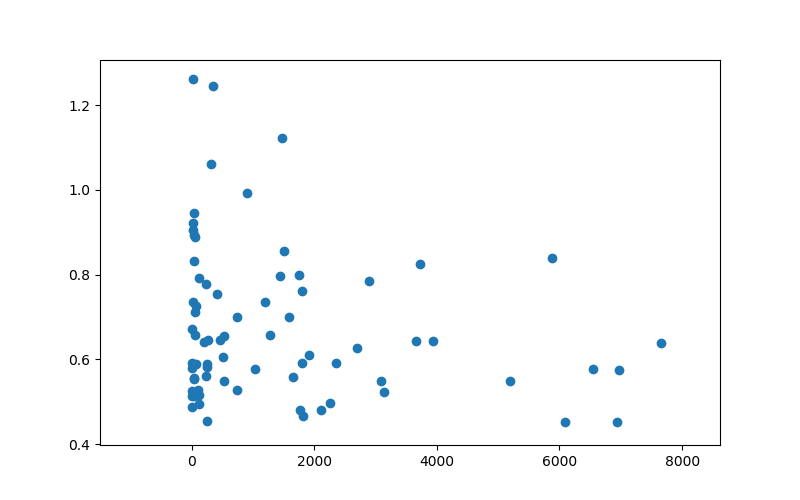

In [54]:
#plot with relationship between number of reported crimes and annual avg % change in home prices
plt.figure(figsize=(8,5))
plt.scatter(combined_df['Number of Reported Crimes'], combined_df['Annual Avg % Change'])
plt.show()

In [24]:
precombine_filtered_home_prices = filtered_home_prices_df.reset_index()
combined_price_crime = precombine_filtered_home_prices.combine_first(rename_crime_frequency_df)
combined_price_crime.head()

,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,CITY,Number of Reported Crimes
0,645000,647900,650700,653500,656900,661200,665600,671300,677400,683200,688500,693800,Los Angeles,1171.0
1,584700,586900,588500,590300,592900,595900,599200,604500,610500,615300,618900,621700,Long Beach,29.0
2,850000,853300,855200,856100,858500,863600,868900,874900,881800,888700,894700,900400,Glendale,349.0
3,235200,236900,238900,241500,244300,247400,250500,253900,257600,261000,264100,266900,Lancaster,1482.0
4,265300,267400,269600,272000,274900,277800,280600,284000,287400,290300,293500,297000,Palmdale,325.0


<IPython.core.display.Javascript object>


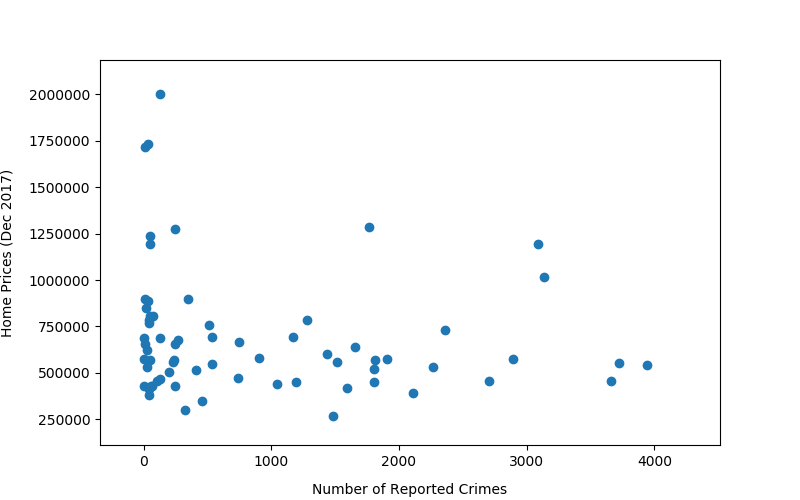

In [49]:
#plot number of reported crimes vs. home prices
plt.figure(figsize=(8,5))
plt.scatter(combined_price_crime['Number of Reported Crimes'], combined_price_crime['2017-12'])
plt.xlabel('Number of Reported Crimes', labelpad=10)
plt.ylabel('Home Prices (Dec 2017)', labelpad=10)

plt.show()

In [26]:
#create pandas dataframe for historical crime data (2017) from csv file
crime_data_df = pd.read_csv("RawData/2017-PART_I_AND_II_CRIMES.csv")
crime_data_df. head()

,LURN_SAK,INCIDENT_DATE,INCIDENT_REPORTED_DATE,CATEGORY,STAT,STAT_DESC,ADDRESS,STREET,CITY,ZIP,INCIDENT_ID,REPORTING_DISTRICT,SEQ,GANG_RELATED,UNIT_ID,UNIT_NAME,DELETED
0,18288959,8/3/2017 23:53,8/3/2017,VEHICLE / BOATING LAWS,255,VEHICLE AND BOATING LAWS: Misdemeanor,"4300 ROSEMEAD BLVD, ROSEMEAD, CA 91770",4300 ROSEMEAD BLVD,ROSEMEAD,91770.0,917-08914-0531,531,8914,NO,CA0190005,TEMPLE,N
1,18079991,3/7/2017 8:23,3/7/2017,MISCELLANEOUS NON-CRIMINAL,720,"VEHICLE/BOATING LAWS, CITATIONS: Hazardous Cit...","CLARK AVE AND MAPLE ST, BELLFLOWER, CA 90706",CLARK AVE AND MAPLE ST,BELLFLOWER,90706.0,917-05086-1334,1334,5086,NO,CA0190013,LAKEWOOD,N
2,18215223,5/24/2017 9:20,5/24/2017,MISCELLANEOUS NON-CRIMINAL,501,MISCELLANEOUS: Vehicle Repossessed,"11000 ALONDRA BLVD, CERRITOS, CA",11000 ALONDRA BLVD,CERRITOS,NaN,917-02607-2310,2310,2607,NO,CA01900R7,CERRITOS,N
3,18077911,3/4/2017 22:18,3/4/2017,MISCELLANEOUS NON-CRIMINAL,687,"NON-CRIMINAL, CUSTODY INCIDENTS - Inmate Sick/...","11800 S ALAMEDA ST, LYNWOOD, CA 90262",11800 S ALAMEDA ST,LYNWOOD,90262.0,017-00612-5700,5700,612,NO,CA0190053,CRDF,N
4,18382253,10/31/2017 5:00,10/31/2017,ACCIDENTS TRAFFIC/VEH./BOAT,471,"ACCIDENTS, TRAFFIC-VEHICLE OR BOAT: Accident, ...","10TH ST W AND AVENUE L, LANCASTER, CA",10TH ST W AND AVENUE L,LANCASTER,NaN,917-21237-1124,1124,21237,NO,CA0190024,LANCASTER,N


In [27]:
#delete unneeded columns in historical crime dataset 
del crime_data_df['LURN_SAK']
del crime_data_df['STAT']
del crime_data_df['STAT_DESC']
del crime_data_df['ADDRESS']
del crime_data_df['STREET']
del crime_data_df['INCIDENT_ID']
del crime_data_df['REPORTING_DISTRICT']
del crime_data_df['SEQ']
del crime_data_df['UNIT_ID']
del crime_data_df['UNIT_NAME']
del crime_data_df['DELETED']

In [28]:
#drop 'city' column with NaN values
crime_data_df = crime_data_df.dropna(subset=['CITY'])

In [29]:
#display first five 
crime_data_df.head()

,INCIDENT_DATE,INCIDENT_REPORTED_DATE,CATEGORY,CITY,ZIP,GANG_RELATED
0,8/3/2017 23:53,8/3/2017,VEHICLE / BOATING LAWS,ROSEMEAD,91770.0,NO
1,3/7/2017 8:23,3/7/2017,MISCELLANEOUS NON-CRIMINAL,BELLFLOWER,90706.0,NO
2,5/24/2017 9:20,5/24/2017,MISCELLANEOUS NON-CRIMINAL,CERRITOS,NaN,NO
3,3/4/2017 22:18,3/4/2017,MISCELLANEOUS NON-CRIMINAL,LYNWOOD,90262.0,NO
4,10/31/2017 5:00,10/31/2017,ACCIDENTS TRAFFIC/VEH./BOAT,LANCASTER,NaN,NO


In [30]:
#checking datum's datatype
crime_data_df.dtypes

INCIDENT_DATE              object
INCIDENT_REPORTED_DATE     object
CATEGORY                   object
CITY                       object
ZIP                       float64
GANG_RELATED               object
dtype: object

In [31]:
#calculate the sum of NaN values for zipcode in dataframe
zip_nan_sum = crime_data_df['ZIP'].isnull().sum()
print(f'{zip_nan_sum} records have no values for zip code.\n')

131131 records have no values for zip code.



In [32]:
#number of records of crime reported to Los Angeles County Sheriff Department
len(crime_data_df)

298572

In [33]:
#drop zip code
del crime_data_df['ZIP']

In [34]:
#displaying updated dataframe
crime_data_df.head()

,INCIDENT_DATE,INCIDENT_REPORTED_DATE,CATEGORY,CITY,GANG_RELATED
0,8/3/2017 23:53,8/3/2017,VEHICLE / BOATING LAWS,ROSEMEAD,NO
1,3/7/2017 8:23,3/7/2017,MISCELLANEOUS NON-CRIMINAL,BELLFLOWER,NO
2,5/24/2017 9:20,5/24/2017,MISCELLANEOUS NON-CRIMINAL,CERRITOS,NO
3,3/4/2017 22:18,3/4/2017,MISCELLANEOUS NON-CRIMINAL,LYNWOOD,NO
4,10/31/2017 5:00,10/31/2017,ACCIDENTS TRAFFIC/VEH./BOAT,LANCASTER,NO


In [35]:
#counts of crime reported in 2017 by city in Los Angeles County
crime_data_df['CITY'].value_counts().head()

LOS ANGELES    43502
LANCASTER      23440
COMPTON        17044
PALMDALE       16288
CARSON         10872
Name: CITY, dtype: int64

The unique count summary shows cities not in the Los Angeles county or even neighborhoods. Because total is a total of 438 unique ~cities.

In [36]:
#counts of crime reported in 2017 by category in Los Angeles County
crime_data_df['CATEGORY'].value_counts().head()

MISCELLANEOUS NON-CRIMINAL    92598
LARCENY THEFT                 34288
VEHICLE / BOATING LAWS        20675
NARCOTICS                     16572
NON-AGGRAVATED ASSAULTS       14818
Name: CATEGORY, dtype: int64

In [37]:
#filter out cities/areas not in Los Angeles county 

#[list(crime_data_df.CITY) for city in home_price_city_list]

#city_crime = crime_data_df.groupby(crime_data_df.CITY == city for city in home_price_city_list)

#crime_data_df.set_index(crime_data_df['CITY'])
    
#row['CITY'] not in home_price_city_list:
#crime_data_df.drop(row)
        

In [38]:
#filter 2017 historical crime data to include only cities in Los Angeles County
filtered_crime_data = crime_data_df[crime_data_df.CITY.isin(upperCase_home_price_city_list)]
filtered_crime_data.head()

NameError: name 'upperCase_home_price_city_list' is not defined

In [ ]:
grouped_city_df = filtered_crime_data.sort_values(by='CITY')
grouped_city_df.head()

In [ ]:
#count how many crimes reported are gang-related
counter = 0
for gang in list(grouped_city_df['GANG_RELATED']):
    if gang == 'YES':
        counter += 1
print(f'{counter} crimes are gang related.')

In [ ]:
#dataframe displaying crime reported that are gang related
df_pd = grouped_city_df[grouped_city_df['GANG_RELATED'] == 'YES']
display(pd.head(10))

print(f'{len(pd["GANG_RELATED"])} crimes are gang related.')


In [ ]:
grouped_city_df['CATEGORY'].value_counts().head()

In [ ]:
#goal: compile to get city as higher index
reset_df = df_pd.reset_index(drop=True)

In [ ]:
reset_df.head(10)

In [ ]:
gang_sort_incident_date_df = reset_df.set_index('CITY').sort_values(by='INCIDENT_DATE').head(10)